# Linear regression

### Simple Example with Simulated Data

For this example, we are going to keep it simple, stay in 2 dimensions, and use OLS to fit a line to some data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n = 10
np.random.seed(146)
x = np.random.normal(size=(n,1))

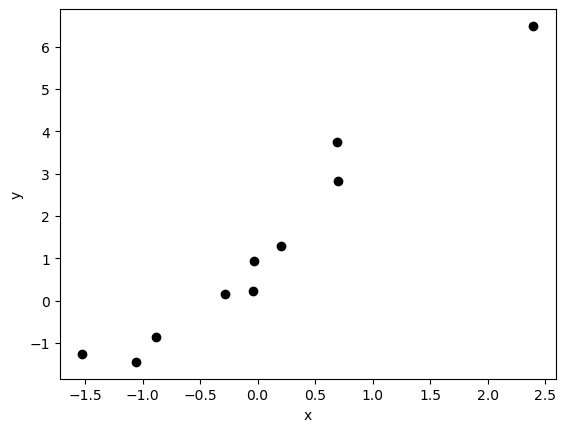

In [5]:
noise_strength = 0.5
np.random.seed(147)
noise = np.random.normal(scale=noise_strength, size=(n,1))
y = 1 + 2*x + noise
plt.scatter(x,y, label='Original data', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression as LR

lin_reg = LR()
lin_reg.fit(x, y)

LinearRegression()

In [7]:
print('Model coefficient: ', lin_reg.coef_)
print('Model intercept: ', lin_reg.intercept_)

Model coefficient:  [[2.20133004]]
Model intercept:  [1.17125563]


In [10]:
y_pred = lin_reg.predict(x)
y_pred

array([[ 6.44669588],
       [ 1.08737861],
       [-1.14789519],
       [-0.76878495],
       [ 2.68591731],
       [ 0.54581176],
       [-2.18430558],
       [ 2.70525462],
       [ 1.10192548],
       [ 1.62760646]])

In [12]:
lin_reg.score(x, y) # gets R^2 value

0.9449458126811453

In [ ]:
#What do you notice?
for i in range(len(y)):
    print(y[i], y_pred[i])

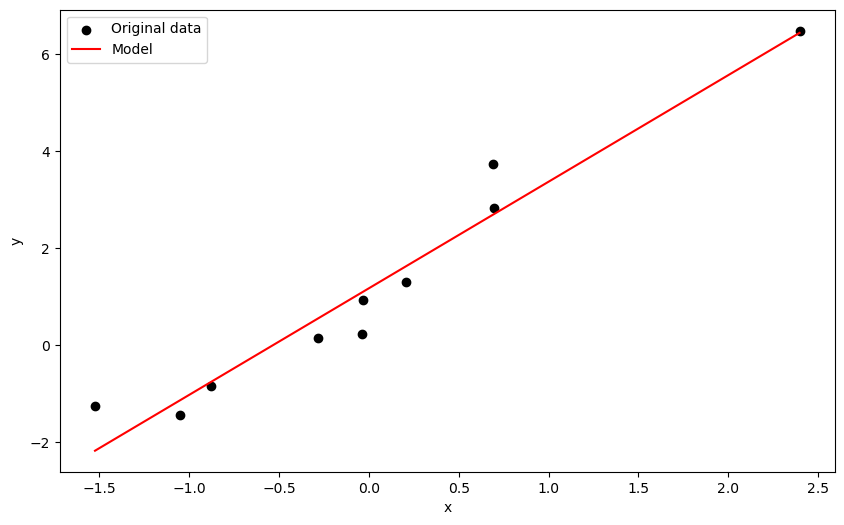

In [11]:
x_range = [min(x), max(x)]
y_pred = lin_reg.predict(x_range)

plt.figure(figsize = (10,6))
plt.scatter(x,y, label='Original data', color='k')
plt.plot(x_range, y_pred, label='Model', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can use the model to make predictions for new x values:

In [ ]:
np.random.seed(201)
new_x = np.random.normal(size=(20,1))
y_pred = lin_reg.predict(new_x)

plt.scatter(x,y, label='Original data', color='k')
plt.scatter(new_x, y_pred, label='Predicted values', color='r')
plt.title('Our randomly generated data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Why did the model pick the line that it did? The goal was to minimize the sum of the squared errors between the model and the data. Let's plot the errors:

In [ ]:
def VizSquaredErrors(x,y,model):
    # Function will plot x and y, show the best fit line as well as the squared errors, and return the raw error terms
    
    # Fit the model and plot the data
    model.fit(x,y)
    yp = model.predict(x)
    errors = abs(y - yp)
    plt.scatter(x,y,color='black',label='Actual Data')
    
    # Compute a range of x values to plot the model as a continuous line
    x_rng = np.linspace(min(x),max(x),20)
    y_pred = model.predict(x_rng)
    plt.plot(x_rng,y_pred,color='red',label='Fitted Model')
    
    # Draw squares at each data point indicating the squared error
    ax = plt.gca()
    for i,xi in enumerate(x):
        r = plt.Rectangle((xi, min(y[i],yp[i])),width=errors[i],height=errors[i],facecolor='blue',fill=True,alpha=0.1)
        ax.add_patch(r)
    plt.axis('equal')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()
    return errors

In [ ]:
VizSquaredErrors(x,y,lin_reg)

The red line is the line that minimizes the sum of the squared errors between the model and the data.  That is, it makes the total area of all the blue squares as small as possible.

### Scoring the model

The score of a model refers to how well the model fits the data.  There is also usually more than one way to score a model!

**Mean-squared error (MSE)** is one way to score a model like this, and it is pretty easy to compute.  It is exactly what it sounds like - it is the mean of the squared errors!

We could calculate this by hand:

In [ ]:
#We will recreate the model just in case we ran other code in between
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)
errors = y-y_pred
mse = np.mean(errors**2)
mse

Or use scikit-learn:

In [ ]:
from sklearn.metrics import mean_squared_error

MSE is useful for comparing between models, but we only have one model with nothing to compare it to! 

The default scoring method that is used when we call lin_reg.score(x,y) is called $R^2$, or the **coefficient of determination**.

In [ ]:
print('Model score: ', )
print('Model MSE: ', mean_squared_error(lin_reg.predict(x),y))

The coefficient of determination is the correlation coefficient squared:

In [ ]:
r = np.corrcoef(x,y,rowvar=False)[0][1]
r

In [ ]:
print(r**2)

## OLS on real data (Multiple linear regression)

In [ ]:
import pandas as pd
concrete = pd.read_excel('./data/Concrete_Data.xls')

In [ ]:
concrete.head()

In [ ]:
concrete.columns = [item.split('(')[0].rstrip().replace(' ','_') for item in concrete.columns]

In [ ]:
concrete.head()

In [ ]:
import seaborn as sns
sns.stripplot(data = concrete, orient = 'h')

In [ ]:
X = concrete

In [ ]:
y = concrete['Concrete_compressive_strength']

In [ ]:
lin_reg = LR()
lin_reg.fit(X,y)
lin_reg.score(X,y)

We will compare the predicted values to the actual values we had for y. What does it mean to make a prediction? 

In [ ]:
lin_reg.coef_

In [ ]:
obs = np.array(X.iloc[0])
print('Coefficients:',obs*lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
sum(obs * lin_reg.coef_) + lin_reg.intercept_

In [ ]:
lin_reg.predict([obs])

In [ ]:
y_pred = lin_reg.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(y, y_pred, alpha=0.5, ec='k')
plt.plot([min(y), max(y)],[min(y),max(y)], ':k')
plt.axis('equal')
plt.xlabel('Actual Compressive Strength', fontsize=14)
plt.ylabel('Predicted Compressive Strength', fontsize=14)
plt.show()